In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import f1_score as f1_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


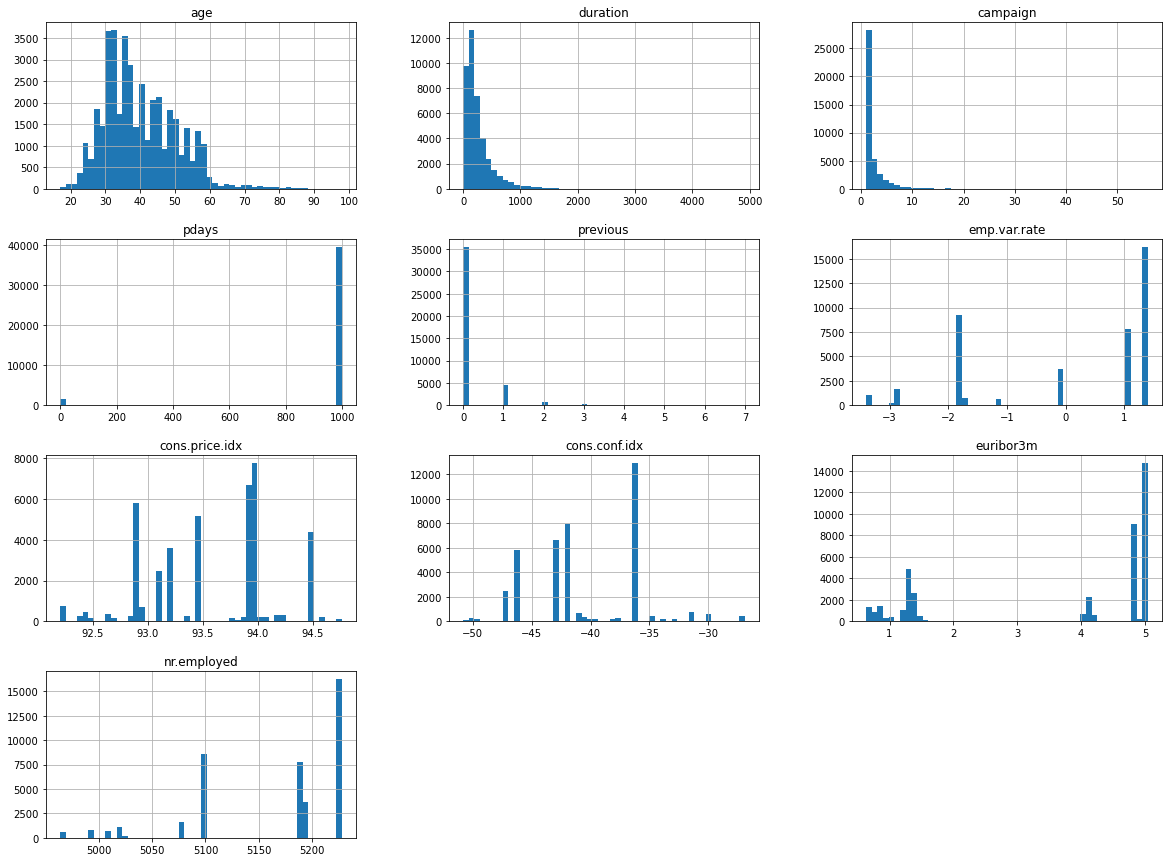

In [6]:
_ = df.hist(bins=50, figsize=(20,15))

In [7]:
df1 = df.copy()

In [8]:
le = LabelEncoder()
df1['y'] = le.fit_transform(df1['y'])
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [9]:
df1 = pd.get_dummies(df1)
df1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [10]:
df1 = df1.drop(columns=['duration'])
df1

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [11]:
df1.isnull().sum()

0

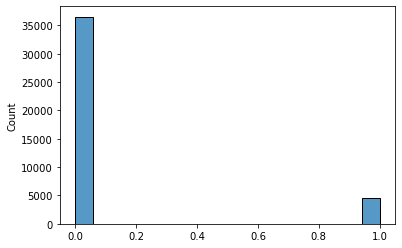

In [12]:
y = df1['y'].values
_ = sns.histplot(y)

In [13]:
value, count = np.unique(y, return_counts=True)
print('Percentage of zeros: %f' % (count[0]*100/(count[0]+count[1])))
print('Percentage of ones: %f' % (count[1]*100/(count[0]+count[1])))

Percentage of zeros: 88.734583
Percentage of ones: 11.265417


In [14]:
train, test = train_test_split(df1, test_size=0.2, random_state=50, stratify=y)
print('Training set size: %d' % len(train))
print('Test set size: %d' % len(test))

Training set size: 32950
Test set size: 8238


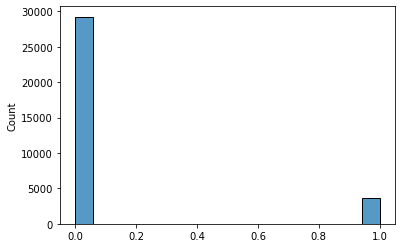

In [15]:
y_train = train['y'].values
_ = sns.histplot(y_train)

In [16]:
value_train, count_train = np.unique(y_train, return_counts=True)
print('Percentage of zeros: %f' % (count_train[0]*100/(count_train[0]+count_train[1])))
print('Percentage of ones: %f' % (count_train[1]*100/(count_train[0]+count_train[1])))

Percentage of zeros: 88.734446
Percentage of ones: 11.265554


In [17]:
df2 = train.copy()
y_df = df2['y'].copy()
X_df = df2.drop(columns=['y']).copy()


In [18]:
# CV scores of a Random Forest Classifier with the Area Under the Receiver Operating Characteristic Curve (auc) metric
clf = RandomForestClassifier(n_estimators=100, max_depth=6) # QUIZ
scores_cv = cross_val_score(clf, X_df, y_df, cv=10, scoring = make_scorer(auc)) # QUIZ
# StratifiedKFold is used by default in cross_val_score IF a) cv is integer, b) estimator is a classifier, and c) y is binary or multiclass
#print(scores_ras)

# CV scores of a Dummy Classifier with the Area Under the Receiver Operating Characteristic (auc) metric
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_scores = cross_val_score(dummy_clf, X_df, y_df, cv=10, scoring=make_scorer(auc)) # QUIZ
#print(dummy_scores)

# Comparison of the results
print("Random Forest average: %0.8f +/- %0.8f" % (scores_cv.mean(), scores_cv.std()))
print("Dummy average: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

Random Forest average: 0.58482553 +/- 0.01666758
Dummy average: 0.50273714 +/- 0.00902606


In [19]:
trees = [int(x) for x in np.linspace(50, 150, 3)]
depth = [int(x) for x in np.linspace(2, 6, 3)]
split = [int(x) for x in np.linspace(2, 10, 3)]
leaf = [int(x) for x in np.linspace(1, 9, 3)]

rf_params = {
    'n_estimators': trees,
    'max_depth': depth,
    'min_samples_split': split,
    'min_samples_leaf': leaf
}

# Grid Search for hyper-parameter tuning
clf = GridSearchCV(clf, param_grid=rf_params, scoring=make_scorer(auc), n_jobs=-1)
clf.fit(X_df, y_df)
print(clf)

GridSearchCV(estimator=RandomForestClassifier(max_depth=6), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 5, 9],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(roc_auc_score))


In [20]:
# CV metric of the parameter-tuned Random Forest Classifier
print("Average AUC parameter tuning:", clf.best_score_)

Average AUC parameter tuning: 0.5848440245637866


In [21]:
# Best estimator found with GridSearchCV
clf = clf.best_estimator_
# QUIZ - clf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=60)
# QUIZ - clf.fit(X_df, y_df)
clf

RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=50)

In [30]:
# Top 3 features
importances = clf.feature_importances_
#importances
#std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
#std
indices = np.argsort(importances)[::-1]
#print(indices)
#X_df.columns
for no in range(3): # top 3
    print(X_df.columns[indices[no]])

nr.employed
euribor3m
pdays


In [35]:
df_test = test.copy()

# Separating features and label
y_df_test = df_test['y'].copy()
X_df_test = df_test.drop(columns=['y']).copy()

# Making sure the same number of features are used in both the training and testing set
assert X_df.shape[1] == X_df_test.shape[1]

# Prediction
# QUIZ - clf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)
# QUIZ - clf.fit(X_df, y_df)
y_pred = clf.predict(X_df_test)

# Metric when generalizing
f1_score(y_df_test, y_pred)

0.3175394846217789